# IMPORTING THE NECESSARY LIBRARIES

In [1]:
import keras 
import matplotlib.pyplot as plt 
import numpy as np

from keras.models import Sequential 
from keras.layers import  Conv2D, MaxPooling2D, Dense, Flatten,Dropout, Activation
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras import regularizers,optimizers
from keras.datasets import cifar10

Using TensorFlow backend.


# IMPORTING THE DATASET

In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# X_train = X_train[:500]
# Y_train = Y_train[:500]
# X_test = X_test[:500]
# Y_test = Y_test[:500]

print('Shape of training dataset :',X_train.shape)
print('Shape of testing dataste :' ,X_test.shape)

170500096/170498071 [==============================] - 83s 0us/step
Shape of training dataset : (50000, 32, 32, 3)
Shape of testing dataste : (10000, 32, 32, 3)


# FORMAT THE TRAINING SET AND RE-DEFINE TARGET VARIABLE

In [3]:
x_train = X_train.astype('float32')
x_test = X_test.astype('float32')

x_train = x_train/255.
x_test = x_test/255.

y_train = np_utils.to_categorical(Y_train,10)
y_test = np_utils.to_categorical(Y_test,10)

print('Shape of Training Target : ', y_train.shape)
print('Shape of Testing Target : ', y_test.shape)

Shape of Training Target :  (50000, 10)
Shape of Testing Target :  (10000, 10)


# PART A : DEEP LEARNING MODEL (40 POINTS)

## 1. NETWORK ARCHITECHTURE - (32, 32, 64, 64)

In [0]:
def get_trained_model(activation='relu',loss='categorical_crossentropy', optimizer='sgd', epochs = 20, kernel_initializer ='glorot_uniform',bias_initializer ='glorot_uniform'):
    
  model = Sequential()

  #Layer1
  model.add(Conv2D(32, (2,2), input_shape = x_train.shape[1:], kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
  model.add(Activation(activation))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  #Layer2
  model.add(Conv2D(32, (2,2), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
  model.add(Activation(activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))

  #Layer3
  model.add(Conv2D(64, (2,2), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
  model.add(Activation(activation))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  #Layer4
  model.add(Conv2D(64, (2,2), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
  model.add(Activation(activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(BatchNormalization())
  model.add(Activation(activation))
  model.add(Dropout(0.2))

  model.add(Dense(10))
  model.add(Activation('softmax'))
  
  model.compile(loss = loss, optimizer = optimizer, metrics=['accuracy'])
  
  history = model.fit(x = x_train, y = y_train, validation_data = (x_test,y_test), batch_size= 28, epochs= epochs)
  
  return model, history

In [0]:
def train_test_plot(history,epochs):
  plt.figure(0)
  plt.plot(history.history['acc'],'r')
  plt.plot(history.history['val_acc'],'g')
  plt.xticks(np.arange(0, epochs+1, 4.0))
  plt.rcParams['figure.figsize'] = (10, 6)
  plt.xlabel("Num of Epochs")
  plt.ylabel("Accuracy")
  plt.title("Training Accuracy vs Validation Accuracy")
  plt.legend(['train','validation'])

  plt.figure(1)
  plt.plot(history.history['loss'],'r')
  plt.plot(history.history['val_loss'],'g')
  plt.xticks(np.arange(0, epochs+1, 2.0))
  plt.rcParams['figure.figsize'] = (10, 6)
  plt.xlabel("Num of Epochs")
  plt.ylabel("Loss")
  plt.title("Training Loss vs Validation Loss")
  plt.legend(['train','validation'])

# PART B - ACTIVATION FUNCTION (10 POINTS)

In [6]:
model0, history0 = get_trained_model() #ReLU
model1, history1 = get_trained_model(activation='tanh')
model2, history2 = get_trained_model(activation='sigmoid')
model3, history3 = get_trained_model(activation='elu')

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 40s 796us/step - loss: 1.6982 - acc: 0.3919 - val_loss: 1.3827 - val_acc: 0.5171
Epoch 2/20
50000/50000 [==============================] - 36s 720us/step - loss: 1.3461 - acc: 0.5189 - val_loss: 1.3021 - val_acc: 0.5331
Epoch 3/20
50000/50000 [==============================] - 36s 725us/step - loss: 1.2156 - acc: 0.5666 - val_loss: 1.2646 - val_acc: 0.5645
Epoch 4/20
50000/50000 [==============================] - 36s 727us/step - loss: 1.1211 - acc: 0.6043 - val_loss: 1.2632 - val_acc: 0.5556
Epoch 5/20
50000/50000 [==============================] - 36s 725us/step - loss: 1.0423 - acc: 0.6320 - val_loss: 1.0803 - val_acc: 0.6204
Epoch 6/20
50000/50000 [==============================] - 36s 721us/step - loss: 0.9848 - acc: 0.6536 - val_loss: 0.9384 - val_acc: 0.6700
Epoch 7/20
50000/50000 [==============================] - 36s 721us/step - loss: 0.9374 - acc: 0.6683 - val_loss: 0.

## PLOTS FOR *RELU* ACTIVATION

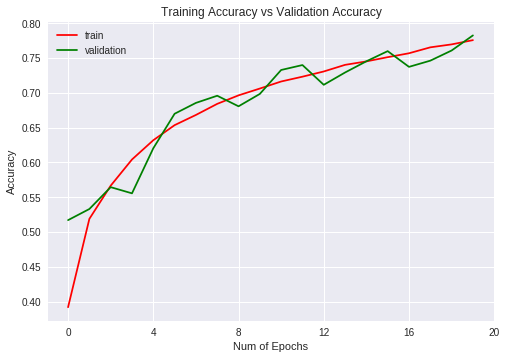

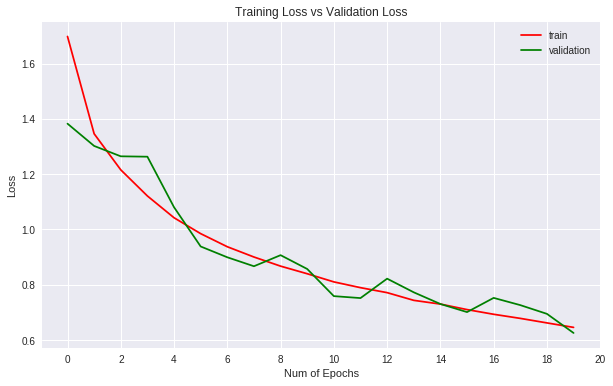

In [7]:
train_test_plot(history0,20)

## PLOTS FOR *TANH* ACTIVATION

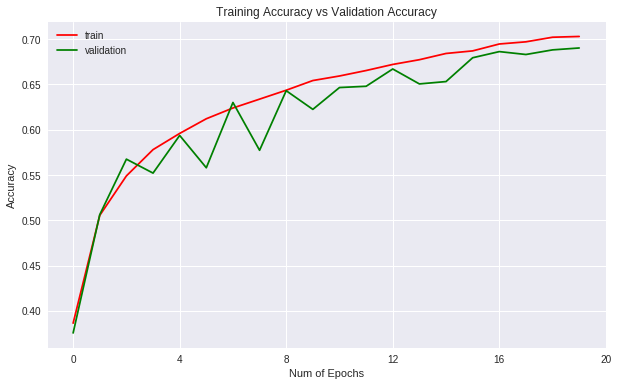

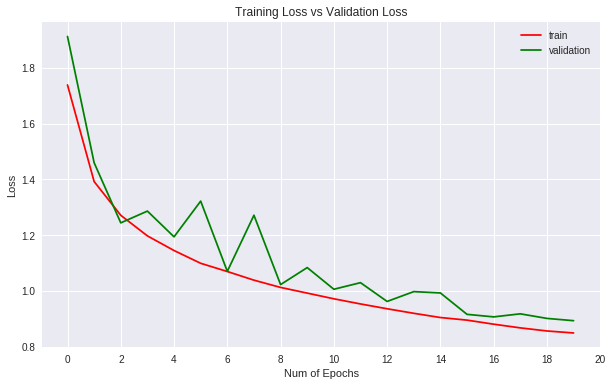

In [8]:
train_test_plot(history1,20)

## PLOTS FOR SIGMOID ACTIVATION

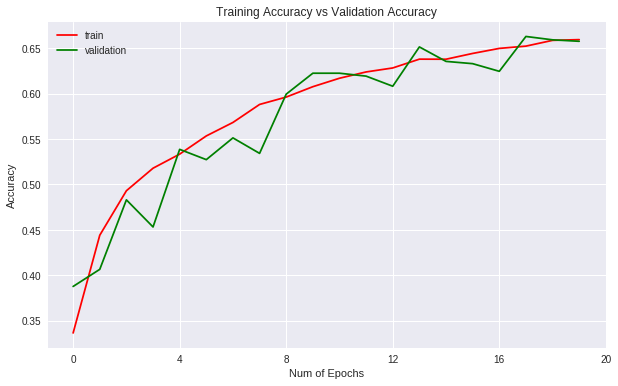

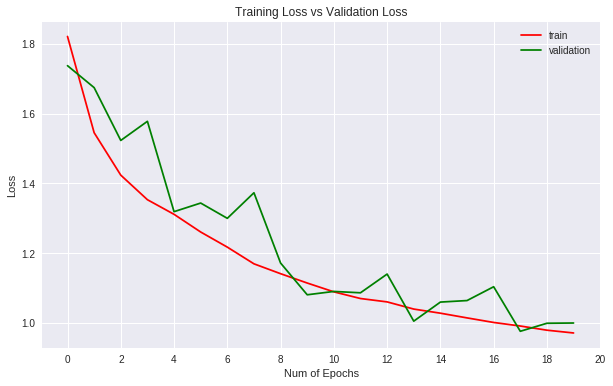

In [9]:
train_test_plot(history2,20)

## PLOTS FOR ELU ACTIVATION

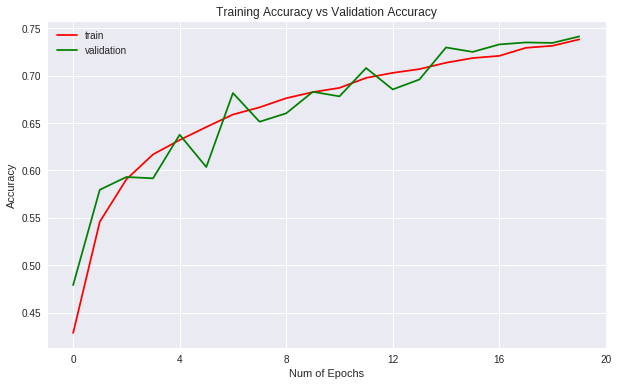

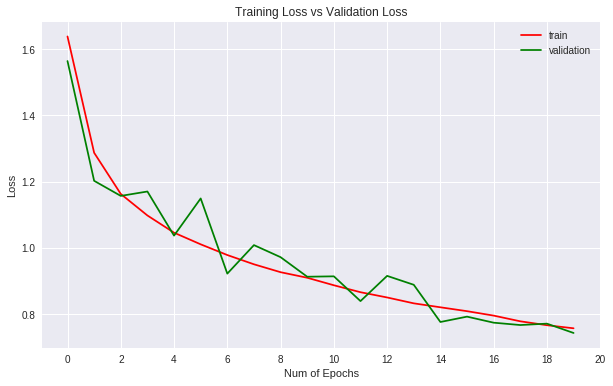

In [10]:
train_test_plot(history3,20)

# PART C - COST FUNCTION (10 POINTS)

In [11]:
model4, history4 = get_trained_model(loss='mean_squared_error')
model5, history5 = get_trained_model(loss='categorical_hinge')
model6, history6 = get_trained_model(loss='kullback_leibler_divergence')
model7, history7 = get_trained_model(loss='cosine_proximity')

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 37s 748us/step - loss: 0.0958 - acc: 0.1495 - val_loss: 0.0888 - val_acc: 0.1707
Epoch 2/20
50000/50000 [==============================] - 36s 713us/step - loss: 0.0884 - acc: 0.2262 - val_loss: 0.0855 - val_acc: 0.2270
Epoch 3/20
50000/50000 [==============================] - 35s 705us/step - loss: 0.0842 - acc: 0.2815 - val_loss: 0.0825 - val_acc: 0.2690
Epoch 4/20
50000/50000 [==============================] - 36s 714us/step - loss: 0.0811 - acc: 0.3195 - val_loss: 0.0804 - val_acc: 0.3078
Epoch 5/20
50000/50000 [==============================] - 36s 710us/step - loss: 0.0789 - acc: 0.3464 - val_loss: 0.0784 - val_acc: 0.3345
Epoch 6/20
50000/50000 [==============================] - 35s 710us/step - loss: 0.0769 - acc: 0.3700 - val_loss: 0.0783 - val_acc: 0.3330
Epoch 7/20
50000/50000 [==============================] - 36s 710us/step - loss: 0.0755 - acc: 0.3860 - val_loss: 0.

## PLOT FOR MEAN SQUARED ERROR COST FUNCTION

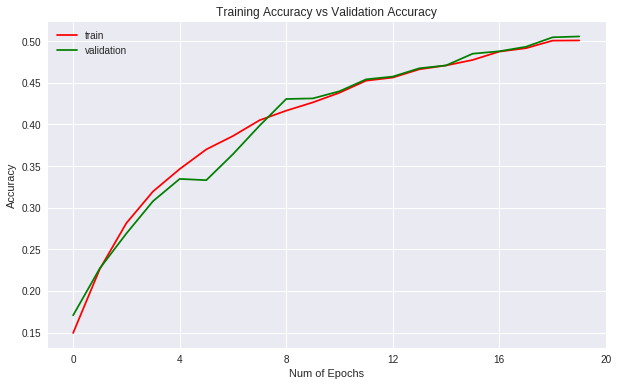

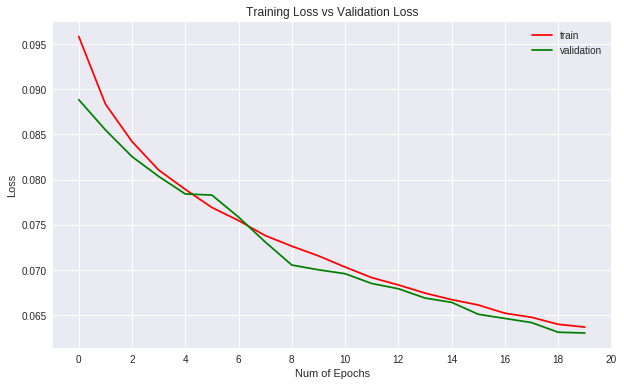

In [47]:
train_test_plot(history4,20)

## PLOT FOR CATEGORICAL HINGE COST FUNCTION

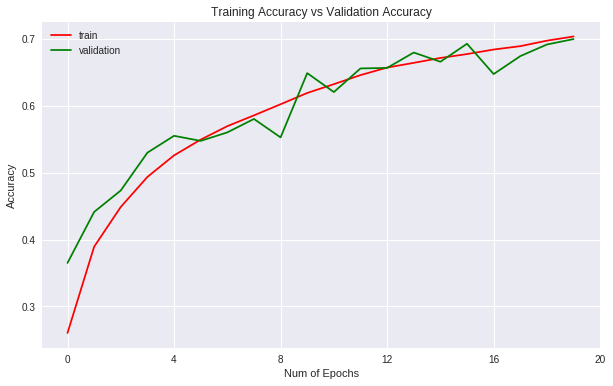

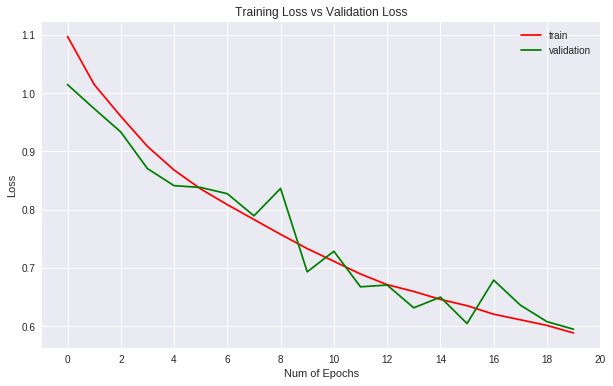

In [48]:
train_test_plot(history5,20)

## PLOT FOR *KULLBACK LEIBLER DIVERGENCE* COST FUNCTION

In [0]:
train_test_plot(history6,20)

## PLOT FOR COSINE PROXIMITY COST FUNCTION

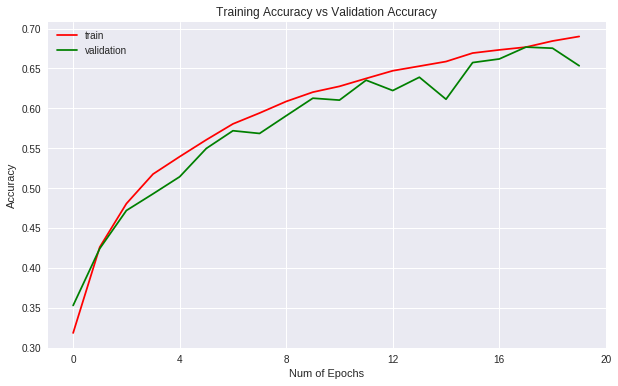

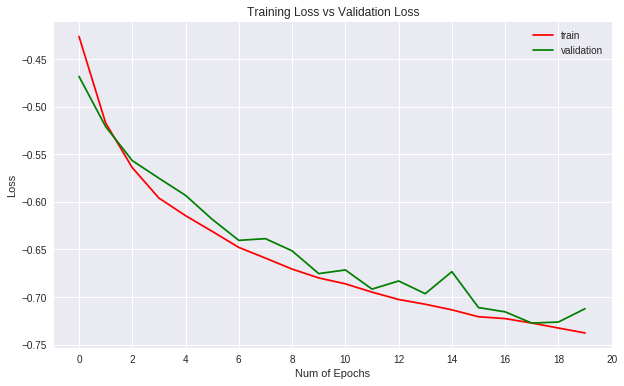

In [49]:
train_test_plot(history7,20)

# PART D - EPOCHS (10 POINTS)

## EPOCHS = 50

In [16]:
model9,history9 = get_trained_model(epochs = 50)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 44s 883us/step - loss: 1.6473 - acc: 0.4110 - val_loss: 1.4011 - val_acc: 0.4997
Epoch 2/50
50000/50000 [==============================] - 43s 861us/step - loss: 1.3005 - acc: 0.5377 - val_loss: 1.2500 - val_acc: 0.5563
Epoch 3/50
50000/50000 [==============================] - 43s 854us/step - loss: 1.1686 - acc: 0.5848 - val_loss: 1.1240 - val_acc: 0.6097
Epoch 4/50
50000/50000 [==============================] - 43s 854us/step - loss: 1.0765 - acc: 0.6204 - val_loss: 1.1756 - val_acc: 0.5939
Epoch 5/50
50000/50000 [==============================] - 43s 855us/step - loss: 1.0082 - acc: 0.6446 - val_loss: 1.1406 - val_acc: 0.6015
Epoch 6/50
50000/50000 [==============================] - 42s 842us/step - loss: 0.9599 - acc: 0.6639 - val_loss: 1.1982 - val_acc: 0.5883
Epoch 7/50
50000/50000 [==============================] - 42s 848us/step - loss: 0.9194 - acc: 0.6731 - val_loss: 1.

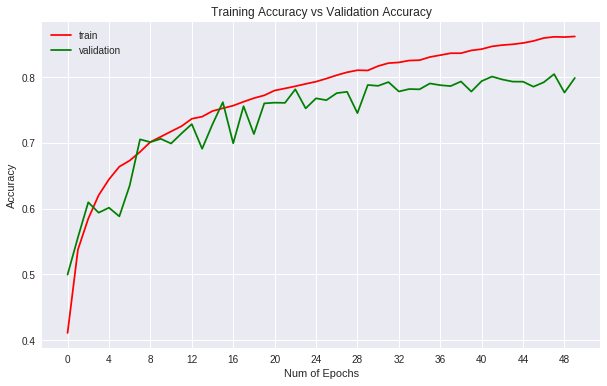

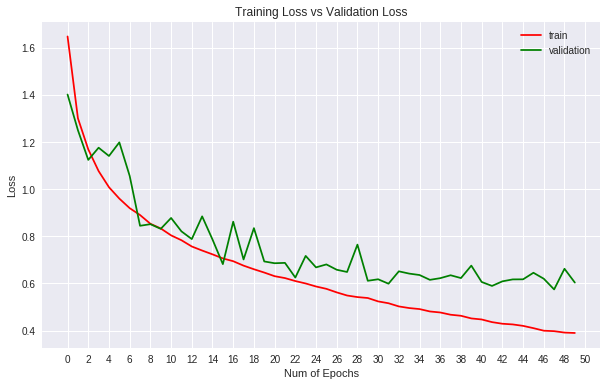

In [50]:
train_test_plot(history9,50)

## EPOCHS = 80

In [18]:
model10,history10 = get_trained_model(epochs = 80)

Train on 50000 samples, validate on 10000 samples
Epoch 1/80
50000/50000 [==============================] - 44s 881us/step - loss: 1.6402 - acc: 0.4149 - val_loss: 1.4666 - val_acc: 0.4859
Epoch 2/80
50000/50000 [==============================] - 41s 829us/step - loss: 1.2965 - acc: 0.5384 - val_loss: 1.3578 - val_acc: 0.5364
Epoch 3/80
50000/50000 [==============================] - 41s 814us/step - loss: 1.1585 - acc: 0.5879 - val_loss: 1.5653 - val_acc: 0.4849
Epoch 4/80
50000/50000 [==============================] - 41s 826us/step - loss: 1.0694 - acc: 0.6222 - val_loss: 1.0716 - val_acc: 0.6281
Epoch 5/80
50000/50000 [==============================] - 41s 821us/step - loss: 1.0037 - acc: 0.6453 - val_loss: 1.0344 - val_acc: 0.6471
Epoch 6/80
50000/50000 [==============================] - 41s 822us/step - loss: 0.9457 - acc: 0.6673 - val_loss: 0.9829 - val_acc: 0.6577
Epoch 7/80
50000/50000 [==============================] - 43s 852us/step - loss: 0.9084 - acc: 0.6824 - val_loss: 0.

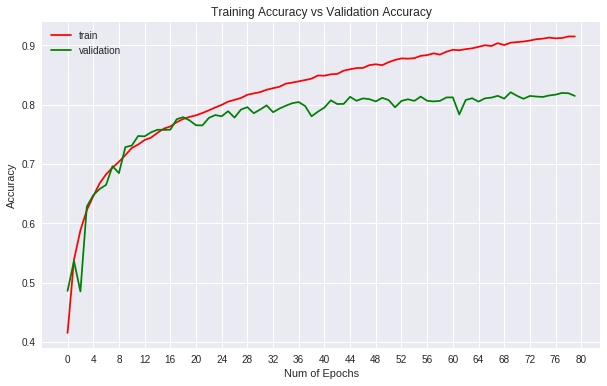

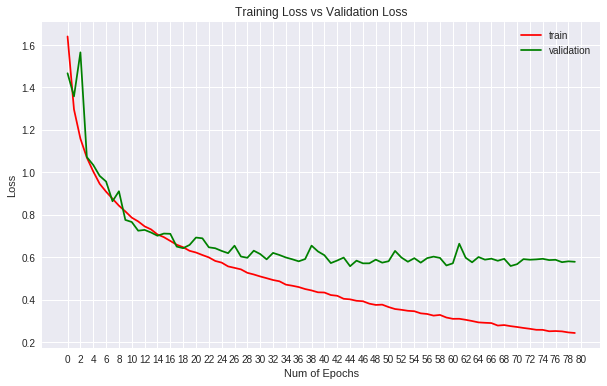

In [51]:
train_test_plot(history10,80)

## EPOCHS = 100

In [20]:
model11,history11 = get_trained_model(epochs = 100)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 44s 889us/step - loss: 1.6303 - acc: 0.4148 - val_loss: 1.3393 - val_acc: 0.5272
Epoch 2/100
50000/50000 [==============================] - 41s 821us/step - loss: 1.2894 - acc: 0.5403 - val_loss: 1.2155 - val_acc: 0.5651
Epoch 3/100
50000/50000 [==============================] - 41s 826us/step - loss: 1.1633 - acc: 0.5879 - val_loss: 1.1190 - val_acc: 0.6025
Epoch 4/100
50000/50000 [==============================] - 41s 827us/step - loss: 1.0764 - acc: 0.6213 - val_loss: 1.0785 - val_acc: 0.6274
Epoch 5/100
50000/50000 [==============================] - 41s 821us/step - loss: 1.0151 - acc: 0.6442 - val_loss: 1.0477 - val_acc: 0.6269
Epoch 6/100
50000/50000 [==============================] - 41s 825us/step - loss: 0.9579 - acc: 0.6631 - val_loss: 0.9451 - val_acc: 0.6661
Epoch 7/100
50000/50000 [==============================] - 41s 820us/step - loss: 0.9141 - acc: 0.6803 - val_l

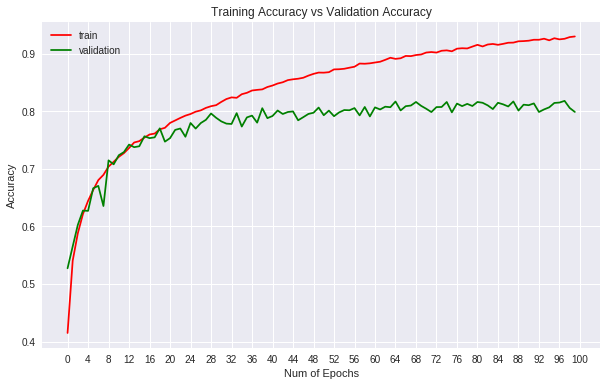

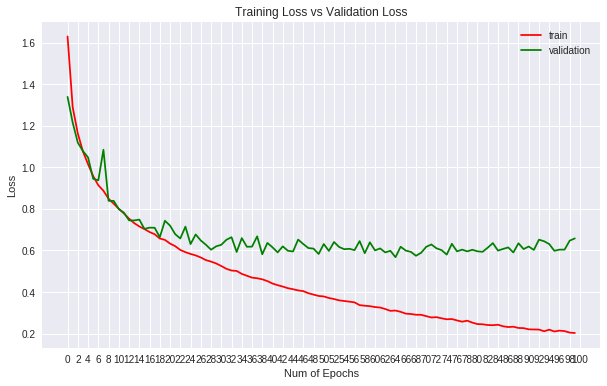

In [21]:
train_test_plot(history11,100)

## EPOCHS = 40

In [22]:
model12,history12 = get_trained_model(epochs = 40)

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 43s 868us/step - loss: 1.6751 - acc: 0.3991 - val_loss: 1.4976 - val_acc: 0.4684
Epoch 2/40
50000/50000 [==============================] - 40s 806us/step - loss: 1.3344 - acc: 0.5209 - val_loss: 1.3212 - val_acc: 0.5334
Epoch 3/40
50000/50000 [==============================] - 40s 805us/step - loss: 1.1902 - acc: 0.5794 - val_loss: 1.1368 - val_acc: 0.5962
Epoch 4/40
50000/50000 [==============================] - 40s 793us/step - loss: 1.0896 - acc: 0.6157 - val_loss: 1.0004 - val_acc: 0.6468
Epoch 5/40
50000/50000 [==============================] - 41s 811us/step - loss: 1.0193 - acc: 0.6389 - val_loss: 0.9235 - val_acc: 0.6737
Epoch 6/40
50000/50000 [==============================] - 40s 807us/step - loss: 0.9700 - acc: 0.6593 - val_loss: 0.9109 - val_acc: 0.6791
Epoch 7/40
50000/50000 [==============================] - 40s 808us/step - loss: 0.9225 - acc: 0.6767 - val_loss: 0.

In [0]:
train_test_plot(history12,40)

## HOW QUICKLY DOES THE NETWORK PLATEAU ?

- If the number of Epochs < 50, the network does not plateau. 
- If the number of Epochs > 50, the network starts plateauing after approximately 60 Epochs.

# PART E - GRADIENT ESTIMATION (10 POINTS)

## ADAM

In [24]:
model13,history13 = get_trained_model(optimizer='adam')

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 55s 1ms/step - loss: 1.3695 - acc: 0.5181 - val_loss: 1.1286 - val_acc: 0.6103
Epoch 2/20
50000/50000 [==============================] - 51s 1ms/step - loss: 0.9862 - acc: 0.6525 - val_loss: 0.8522 - val_acc: 0.7047
Epoch 3/20
50000/50000 [==============================] - 51s 1ms/step - loss: 0.8582 - acc: 0.7010 - val_loss: 0.8349 - val_acc: 0.7108
Epoch 4/20
50000/50000 [==============================] - 50s 1ms/step - loss: 0.7647 - acc: 0.7348 - val_loss: 0.7282 - val_acc: 0.7511
Epoch 5/20
50000/50000 [==============================] - 50s 1ms/step - loss: 0.6992 - acc: 0.7535 - val_loss: 0.7431 - val_acc: 0.7459
Epoch 6/20
50000/50000 [==============================] - 51s 1ms/step - loss: 0.6426 - acc: 0.7755 - val_loss: 0.7177 - val_acc: 0.7545
Epoch 7/20
50000/50000 [==============================] - 50s 1ms/step - loss: 0.6012 - acc: 0.7895 - val_loss: 0.7098 - val_acc

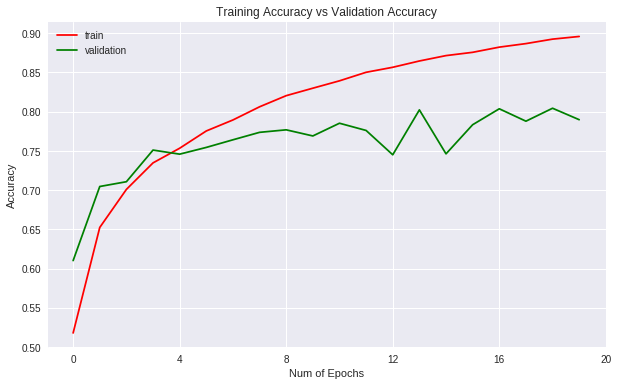

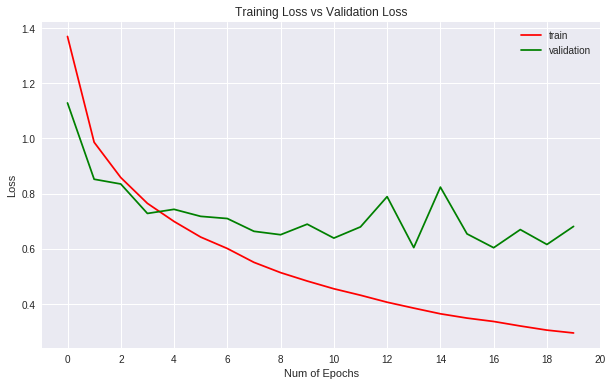

In [52]:
train_test_plot(history13,20)

## RMSProp

In [26]:
model14,history14 = get_trained_model(optimizer='RMSProp')

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 50s 1ms/step - loss: 1.3719 - acc: 0.5186 - val_loss: 0.9909 - val_acc: 0.6502
Epoch 2/20
50000/50000 [==============================] - 47s 931us/step - loss: 0.9866 - acc: 0.6572 - val_loss: 0.8798 - val_acc: 0.6948
Epoch 3/20
50000/50000 [==============================] - 47s 933us/step - loss: 0.8501 - acc: 0.7059 - val_loss: 0.7907 - val_acc: 0.7222
Epoch 4/20
50000/50000 [==============================] - 46s 918us/step - loss: 0.7688 - acc: 0.7360 - val_loss: 0.7070 - val_acc: 0.7566
Epoch 5/20
50000/50000 [==============================] - 47s 934us/step - loss: 0.7126 - acc: 0.7570 - val_loss: 0.8580 - val_acc: 0.7188
Epoch 6/20
50000/50000 [==============================] - 46s 926us/step - loss: 0.6650 - acc: 0.7726 - val_loss: 0.7360 - val_acc: 0.7560
Epoch 7/20
50000/50000 [==============================] - 47s 933us/step - loss: 0.6296 - acc: 0.7856 - val_loss: 0.73

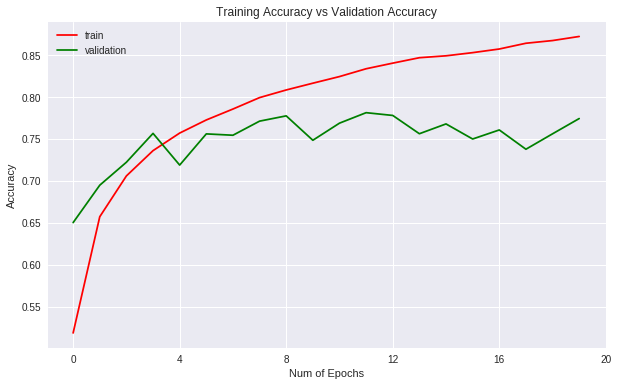

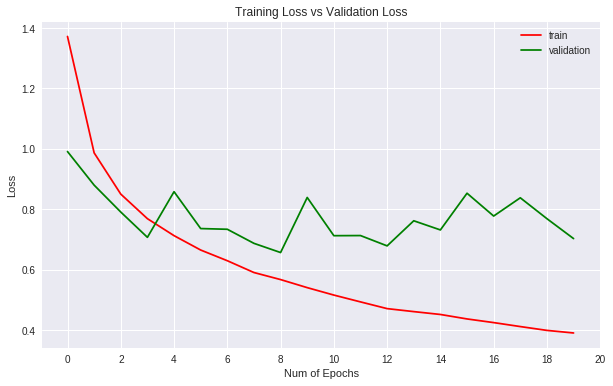

In [53]:
train_test_plot(history14,20)

## ADAGRAD

In [28]:
model15,history15 = get_trained_model(optimizer='Adagrad')

50000/50000 [==============================] - 50s 994us/step - loss: 1.4044 - acc: 0.5022 - val_loss: 1.2251 - val_acc: 0.5703
Epoch 2/20
50000/50000 [==============================] - 45s 899us/step - loss: 1.1035 - acc: 0.6103 - val_loss: 1.0703 - val_acc: 0.6218
Epoch 3/20
50000/50000 [==============================] - 45s 906us/step - loss: 0.9888 - acc: 0.6517 - val_loss: 0.9852 - val_acc: 0.6562
Epoch 4/20
50000/50000 [==============================] - 45s 896us/step - loss: 0.9257 - acc: 0.6764 - val_loss: 0.9216 - val_acc: 0.6763
Epoch 5/20
50000/50000 [==============================] - 45s 909us/step - loss: 0.8706 - acc: 0.6964 - val_loss: 0.9000 - val_acc: 0.6868
Epoch 6/20
50000/50000 [==============================] - 45s 907us/step - loss: 0.8364 - acc: 0.7084 - val_loss: 0.8802 - val_acc: 0.6927
Epoch 7/20
50000/50000 [==============================] - 45s 902us/step - loss: 0.7983 - acc: 0.7217 - val_loss: 0.8442 - val_acc: 0.7058
Epoch 8/20
50000/50000 [==============

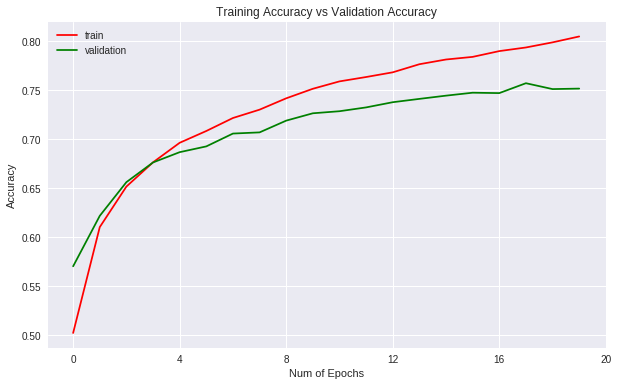

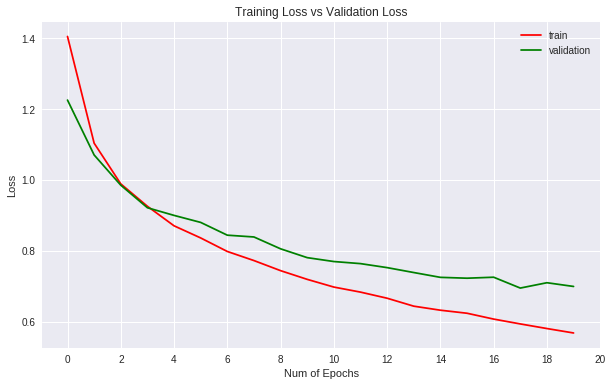

In [54]:
train_test_plot(history15,20)

## ADADELTA

In [1]:
model16,history16 = get_trained_model(optimizer='Adadelta')

NameError: name 'get_trained_model' is not defined

In [0]:
train_test_plot(history16,20)

# PART F - NETWORK ARCHITECTURE (10 POINTS)

## 2. NETWORK ARCHITECHTURE - (32, 32, 64, 64, 128, 128)

In [0]:
def get_trained_model_new(activation='relu', loss='categorical_crossentropy', optimizer='sgd', epochs = 20, kernel_initializer ='glorot_uniform', bias_initializer ='glorot_uniform'):
        model = Sequential()
        
        #Layer1
        model.add(Conv2D(32, (2,2), input_shape = x_train.shape[1:], kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
        model.add(Activation(activation))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        #Layer2
        model.add(Conv2D(32, (2,2), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
        model.add(Activation(activation))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(2,2))
        model.add(Dropout(0.2))
        
        #Layer3
        model.add(Conv2D(64, (2,2), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
        model.add(Activation(activation))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
    
        #Layer4
        model.add(Conv2D(64, (2,2), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
        model.add(Activation(activation))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(2,2))
        model.add(Dropout(0.2))
                
        #Layer5
        model.add(Conv2D(128,(3,3), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
        model.add(Activation(activation))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

        #Layer6
        model.add(Conv2D(128,(3,3), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
        model.add(BatchNormalization())
        model.add(Activation(activation))
        model.add(MaxPooling2D(2,2))

        
        model.add(Flatten())
        model.add(Dense(512))
        model.add(BatchNormalization())
        model.add(Activation(activation))
        model.add(Dropout(0.2))
        
        model.add(Dense(10))
        model.add(Activation('softmax'))
                  
        model.compile(loss = loss, optimizer = optimizer, metrics=['accuracy'])
          
        history = model.fit(x = x_train, y = y_train, validation_data = (x_test,y_test), batch_size= 64, epochs= epochs)
                  
        return model, history

In [33]:
model_new, history_new = get_trained_model_new()

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 32s 632us/step - loss: 1.8350 - acc: 0.3330 - val_loss: 1.6533 - val_acc: 0.3896
Epoch 2/20
50000/50000 [==============================] - 26s 523us/step - loss: 1.5272 - acc: 0.4374 - val_loss: 1.7005 - val_acc: 0.4005
Epoch 3/20
50000/50000 [==============================] - 26s 517us/step - loss: 1.3944 - acc: 0.4913 - val_loss: 1.4251 - val_acc: 0.4984
Epoch 4/20
50000/50000 [==============================] - 26s 512us/step - loss: 1.2910 - acc: 0.5345 - val_loss: 1.6617 - val_acc: 0.4439
Epoch 5/20
50000/50000 [==============================] - 26s 514us/step - loss: 1.2257 - acc: 0.5610 - val_loss: 1.2963 - val_acc: 0.5366
Epoch 6/20
50000/50000 [==============================] - 26s 511us/step - loss: 1.1718 - acc: 0.5830 - val_loss: 1.4133 - val_acc: 0.5179
Epoch 7/20
50000/50000 [==============================] - 26s 521us/step - loss: 1.1253 - acc: 0.5996 - val_loss: 1.

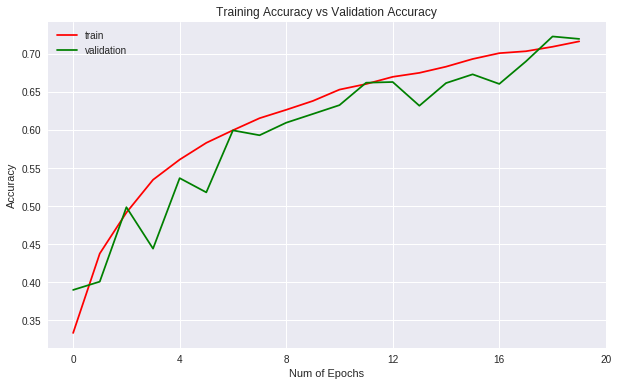

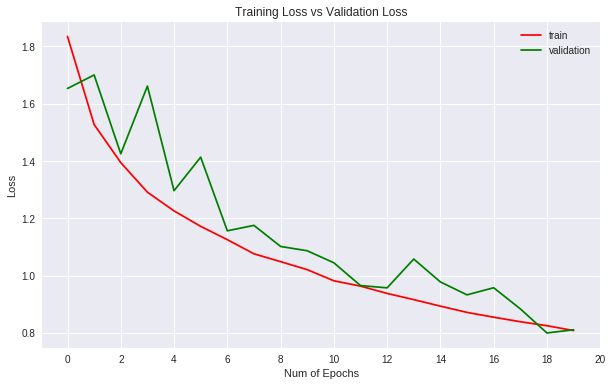

In [34]:
train_test_plot(history_new, 20)

## 3. NETWORK ARCHITECHTURE - (64, 64, 128, 128, 256, 256)

In [0]:
def get_trained_model_double(activation='relu', loss='categorical_crossentropy', optimizer='sgd', epochs = 20, kernel_initializer ='glorot_uniform', bias_initializer ='glorot_uniform'):
        model = Sequential()
        
        #Layer1
        model.add(Conv2D(64, (2,2), input_shape = x_train.shape[1:], kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
        model.add(Activation(activation))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        #Layer2
        model.add(Conv2D(64, (2,2), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
        model.add(Activation(activation))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(2,2))
        model.add(Dropout(0.2))
        
        #Layer3
        model.add(Conv2D(128, (2,2), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
        model.add(Activation(activation))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
    
        #Layer4
        model.add(Conv2D(128, (2,2), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
        model.add(Activation(activation))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(2,2))
        model.add(Dropout(0.2))
                
        #Layer5
        model.add(Conv2D(256,(3,3), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
        model.add(Activation(activation))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

        #Layer6
        model.add(Conv2D(256,(3,3), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
        model.add(BatchNormalization())
        model.add(Activation(activation))
        model.add(MaxPooling2D(2,2))

        
        model.add(Flatten())
        model.add(Dense(512))
        model.add(BatchNormalization())
        model.add(Activation(activation))
        model.add(Dropout(0.2))
        
        model.add(Dense(10))
        model.add(Activation('softmax'))
                  
        model.compile(loss = loss, optimizer = optimizer, metrics=['accuracy'])
          
        history = model.fit(x = x_train, y = y_train, validation_data = (x_test,y_test), batch_size= 64, epochs= epochs)
                  
        return model, history

In [36]:
model_double, history_double = get_trained_model_double()

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 45s 895us/step - loss: 1.7264 - acc: 0.3758 - val_loss: 1.5503 - val_acc: 0.4280
Epoch 2/20
50000/50000 [==============================] - 38s 757us/step - loss: 1.3851 - acc: 0.5003 - val_loss: 1.3889 - val_acc: 0.5109
Epoch 3/20
50000/50000 [==============================] - 38s 761us/step - loss: 1.2327 - acc: 0.5610 - val_loss: 1.3864 - val_acc: 0.5027
Epoch 4/20
50000/50000 [==============================] - 39s 774us/step - loss: 1.1311 - acc: 0.5976 - val_loss: 1.2817 - val_acc: 0.5541
Epoch 5/20
50000/50000 [==============================] - 39s 772us/step - loss: 1.0487 - acc: 0.6298 - val_loss: 1.2487 - val_acc: 0.5640
Epoch 6/20
50000/50000 [==============================] - 38s 769us/step - loss: 0.9840 - acc: 0.6518 - val_loss: 1.0394 - val_acc: 0.6337
Epoch 7/20
50000/50000 [==============================] - 39s 777us/step - loss: 0.9320 - acc: 0.6724 - val_loss: 1.

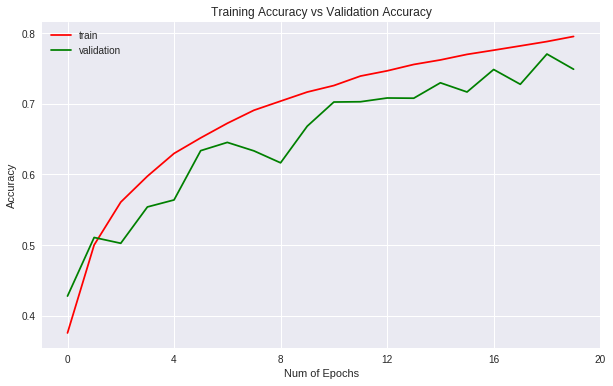

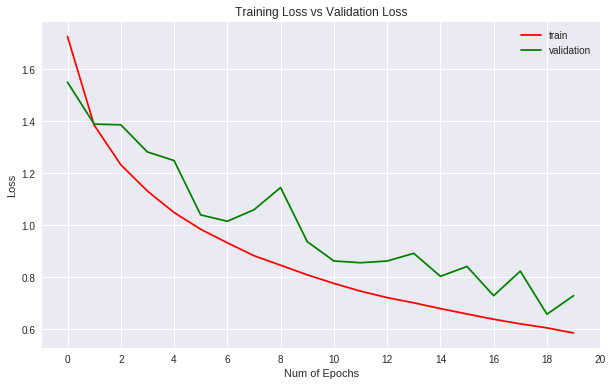

In [37]:
train_test_plot(history_double,20)

# PART G - NETWORK INITIALIZATION (10 POINTS)

## ZERO INITIALIZATION

In [38]:
model17, history17 = get_trained_model(kernel_initializer='Zeros')
model18, history18 = get_trained_model(bias_initializer='Zeros')

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 48s 957us/step - loss: 1.7244 - acc: 0.3804 - val_loss: 1.4189 - val_acc: 0.4900
Epoch 2/20
50000/50000 [==============================] - 42s 846us/step - loss: 1.3788 - acc: 0.5090 - val_loss: 1.1617 - val_acc: 0.5920
Epoch 3/20
50000/50000 [==============================] - 42s 835us/step - loss: 1.2214 - acc: 0.5673 - val_loss: 1.0540 - val_acc: 0.6314
Epoch 4/20
50000/50000 [==============================] - 42s 835us/step - loss: 1.1176 - acc: 0.6061 - val_loss: 0.9952 - val_acc: 0.6522
Epoch 5/20
50000/50000 [==============================] - 42s 842us/step - loss: 1.0569 - acc: 0.6285 - val_loss: 1.0631 - val_acc: 0.6241
Epoch 6/20
50000/50000 [==============================] - 42s 835us/step - loss: 1.0116 - acc: 0.6452 - val_loss: 0.9451 - val_acc: 0.6695
Epoch 7/20
50000/50000 [==============================] - 42s 837us/step - loss: 0.9747 - acc: 0.6581 - val_loss: 0.

### KERNEL INITIALIZATION = ZEROS

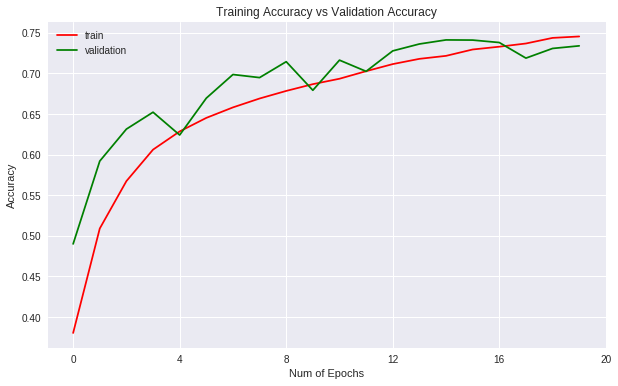

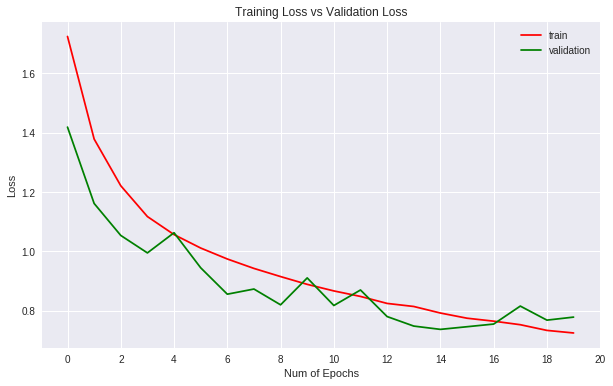

In [39]:
train_test_plot(history17,20)

### BIAS INITIALIZATION = ZEROS

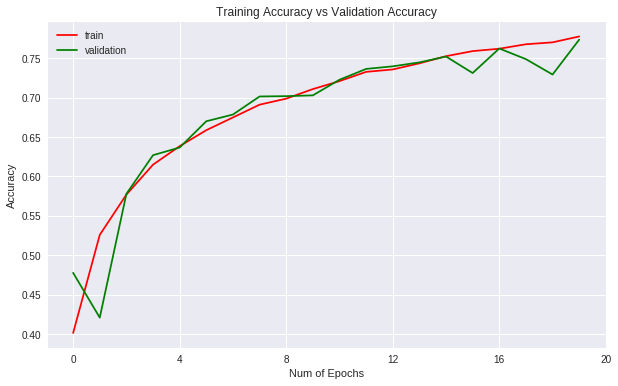

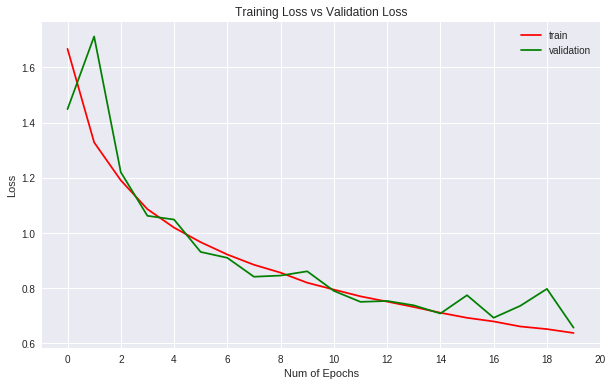

In [40]:
train_test_plot(history18,20)

## RANDOM UNIFORM INITIALIZATION

In [41]:
model19, history19 = get_trained_model(kernel_initializer='RandomUniform')
model20, history20 = get_trained_model(bias_initializer='RandomUniform')

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 48s 969us/step - loss: 1.6098 - acc: 0.4249 - val_loss: 1.2458 - val_acc: 0.5596
Epoch 2/20
50000/50000 [==============================] - 43s 855us/step - loss: 1.2463 - acc: 0.5562 - val_loss: 1.0917 - val_acc: 0.6171
Epoch 3/20
50000/50000 [==============================] - 42s 846us/step - loss: 1.1066 - acc: 0.6088 - val_loss: 0.9421 - val_acc: 0.6689
Epoch 4/20
50000/50000 [==============================] - 42s 849us/step - loss: 1.0199 - acc: 0.6392 - val_loss: 0.9033 - val_acc: 0.6837
Epoch 5/20
50000/50000 [==============================] - 43s 858us/step - loss: 0.9551 - acc: 0.6647 - val_loss: 0.9370 - val_acc: 0.6764
Epoch 6/20
50000/50000 [==============================] - 42s 835us/step - loss: 0.9063 - acc: 0.6818 - val_loss: 0.8926 - val_acc: 0.6880
Epoch 7/20
50000/50000 [==============================] - 42s 844us/step - loss: 0.8670 - acc: 0.6943 - val_loss: 0.

### KERNEL INITIALIZATION = RANDOM UNIFORM

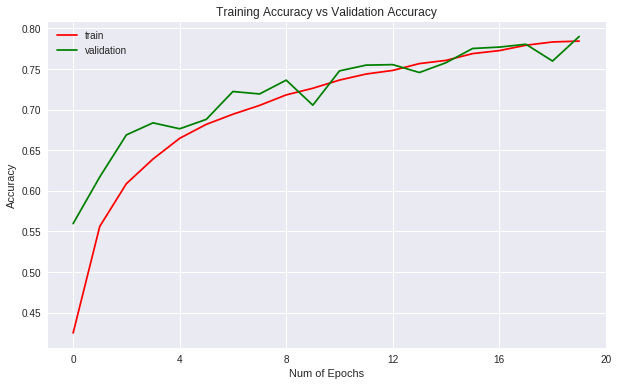

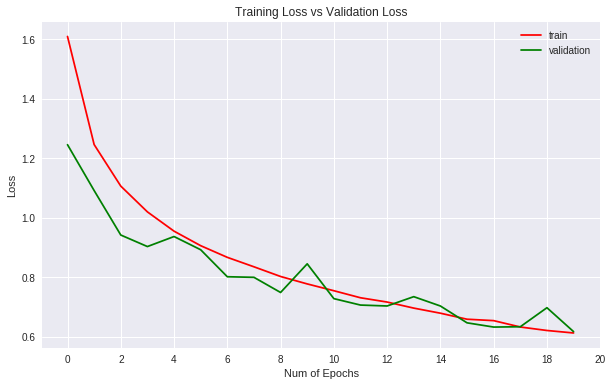

In [42]:
train_test_plot(history19,20)

### BIAS INITIALIZATION = RANDOM UNIFORM

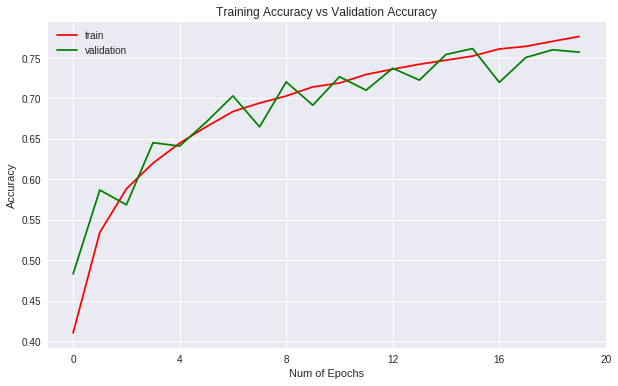

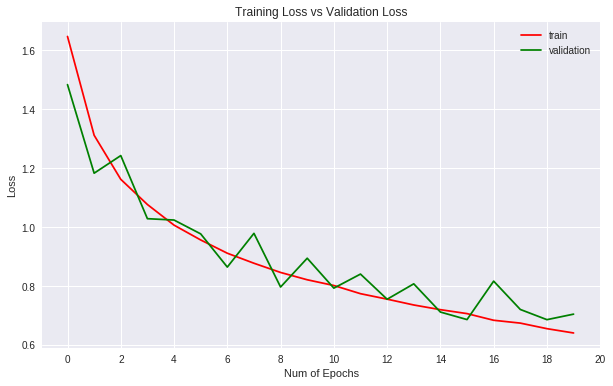

In [43]:
train_test_plot(history20,20)

## XAVIER GLOROT

In [44]:
model21, history21 = get_trained_model(kernel_initializer='glorot_normal')
model22, history22 = get_trained_model(bias_initializer='glorot_normal')

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 49s 983us/step - loss: 1.6496 - acc: 0.4098 - val_loss: 1.4632 - val_acc: 0.4866
Epoch 2/20
50000/50000 [==============================] - 43s 856us/step - loss: 1.3069 - acc: 0.5341 - val_loss: 1.2722 - val_acc: 0.5564
Epoch 3/20
50000/50000 [==============================] - 42s 848us/step - loss: 1.1700 - acc: 0.5839 - val_loss: 1.2150 - val_acc: 0.5778
Epoch 4/20
50000/50000 [==============================] - 43s 851us/step - loss: 1.0792 - acc: 0.6164 - val_loss: 1.0870 - val_acc: 0.6185
Epoch 5/20
50000/50000 [==============================] - 42s 848us/step - loss: 1.0160 - acc: 0.6437 - val_loss: 0.9528 - val_acc: 0.6623
Epoch 6/20
50000/50000 [==============================] - 42s 845us/step - loss: 0.9612 - acc: 0.6627 - val_loss: 0.9202 - val_acc: 0.6773
Epoch 7/20
50000/50000 [==============================] - 43s 855us/step - loss: 0.9228 - acc: 0.6761 - val_loss: 0.

### KERNEL INITIALIZATION = GLOROT NORMAL

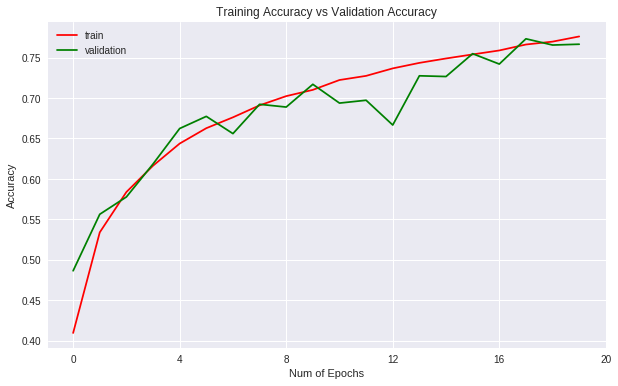

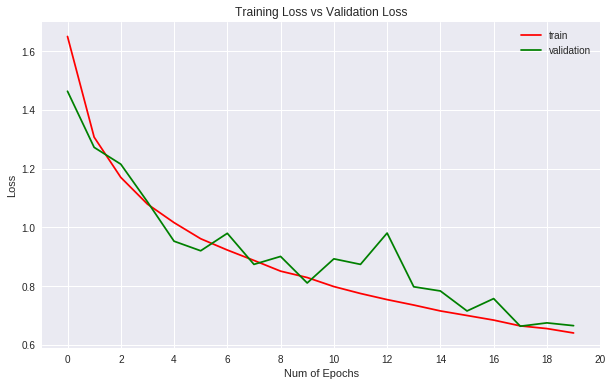

In [57]:
train_test_plot(history21,20)

### BIAS INITIALIZATION = GLOROT NORMAL

In [0]:
train_test_plot(history22,20)